# Logistic Regression Evaluation Matrices - Bank Marketing

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Data: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [176]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

# Get the Data

In [177]:
df = pd.read_csv('29 bank-additional-full.csv',sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

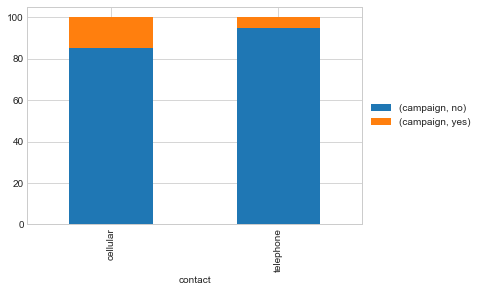

In [178]:
#contact
x_chart = df.pivot_table(values=['campaign'], index=['contact'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

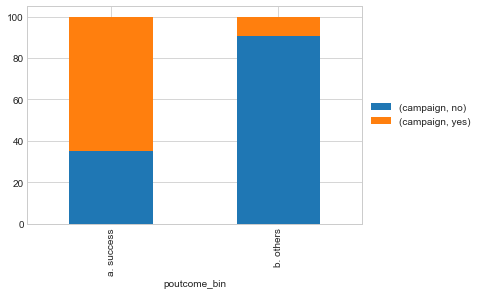

In [179]:
#poutcome_bin
def bin_x (x): 
    if x == "success": return "a. success"
    else: return "b. others"
df['poutcome_bin'] = df['poutcome'].apply(bin_x)
    
x_chart = df.pivot_table(values=['campaign'], index=['poutcome_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

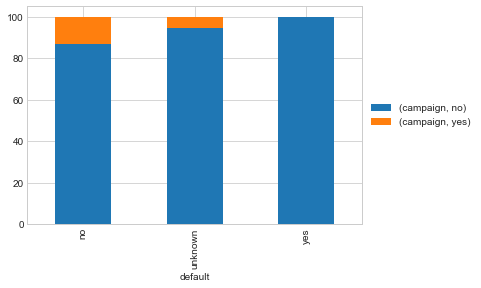

In [180]:
#contact
x_chart = df.pivot_table(values=['campaign'], index=['default'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

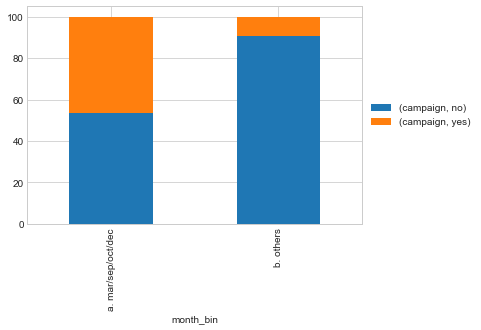

In [181]:
#month_bin
def bin_x (x): 
    if x in ('mar','sep','oct','dec'): return "a. mar/sep/oct/dec"
    else: return "b. others"
df['month_bin'] = df['month'].apply(bin_x)
    
x_chart = df.pivot_table(values=['campaign'], index=['month_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

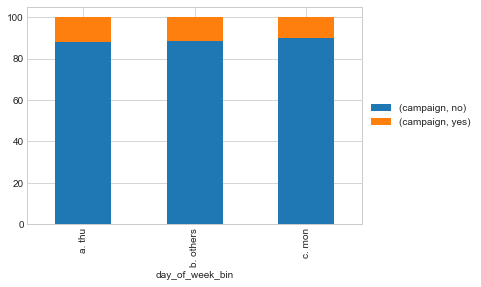

In [182]:
#day_of_week_bin
def bin_x (x): 
    if x == "thu": return "a. thu"
    if x == "mon": return "c. mon"
    else: return "b. others"
df['day_of_week_bin'] = df['day_of_week'].apply(bin_x)
    
x_chart = df.pivot_table(values=['campaign'], index=['day_of_week_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

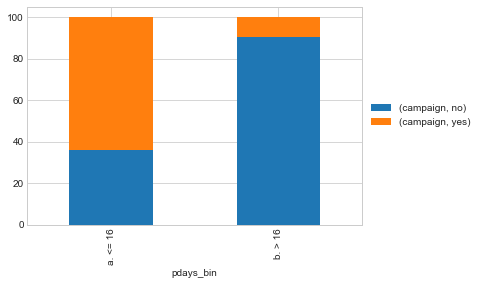

In [183]:
#pdays_bin
def bin_x (x): 
    if x > 16: return "b. > 16"
    else: return "a. <= 16"
df['pdays_bin'] = df['pdays'].apply(bin_x)
    
x_chart = df.pivot_table(values=['campaign'], index=['pdays_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

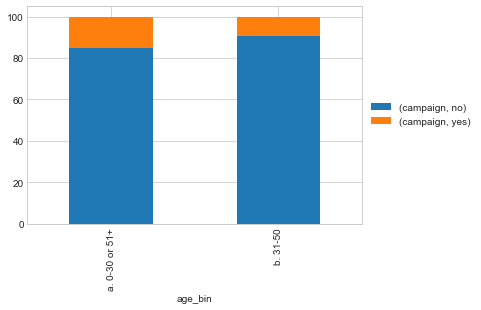

In [184]:
#age_bin
def bin_x (x): 
    if x <= 30: return "a. 0-30 or 51+"
    elif x <= 50: return "b. 31-50"
    else: return "a. 0-30 or 51+"
df['age_bin'] = df['age'].apply(bin_x)
    
x_chart = df.pivot_table(values=['campaign'], index=['age_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

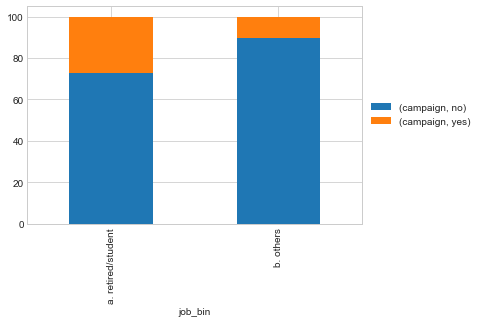

In [185]:
#job_bin
def bin_x (x): 
    if x in ('retired','student'): return "a. retired/student"
    else: return "b. others"
df['job_bin'] = df['job'].apply(bin_x)
    
x_chart = df.pivot_table(values=['campaign'], index=['job_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [186]:
df['actual'] = df['y'].apply(lambda x: 0 if x== "no" else 1)

In [187]:
temp = df[['actual','nr.employed','contact','poutcome',
          'month_bin','day_of_week_bin','pdays_bin','age_bin','job_bin']].copy()

# LOGREG - Building the Model

In [188]:
cat_feats = ['contact','poutcome','month_bin','day_of_week_bin','pdays_bin','age_bin','job_bin']
final_data = pd.get_dummies(temp,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
actual                       41188 non-null int64
nr.employed                  41188 non-null float64
contact_telephone            41188 non-null uint8
poutcome_nonexistent         41188 non-null uint8
poutcome_success             41188 non-null uint8
month_bin_b. others          41188 non-null uint8
day_of_week_bin_b. others    41188 non-null uint8
day_of_week_bin_c. mon       41188 non-null uint8
pdays_bin_b. > 16            41188 non-null uint8
age_bin_b. 31-50             41188 non-null uint8
job_bin_b. others            41188 non-null uint8
dtypes: float64(1), int64(1), uint8(9)
memory usage: 1005.6 KB


In [189]:
x = final_data.drop(['actual'],axis=1)
y = final_data['actual']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [190]:
x_train = sm.add_constant(x_train).copy()
logit = sm.Logit(y_train, x_train)
model = logit.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.284521
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 actual   No. Observations:                28831
Model:                          Logit   Df Residuals:                    28820
Method:                           MLE   Df Model:                           10
Date:                Thu, 28 Dec 2017   Pseudo R-squ.:                  0.1939
Time:                        00:56:45   Log-Likelihood:                -8203.0
converged:                       True   LL-Null:                       -10176.
                                        LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        51.7862      1.619     31.986      0.000      48.613      54.960
nr.employed                  -0.0102      0.000    -31.251      0.000      -0.011      -0.010
contact_telephone            -0.6267      0.054    -11.658      0.000      -0.732      -0.521
poutcome_nonexistent          0.5862      0.065      8.954      0.000       0.458       0.715
poutcome_success              0.7270      0.222      3.272      0.001       0.292       1.162
month_bin_b. others          -0.4043      0.072     -5.617      0.000      -0.545      -0.263
day_of_week_bin_b. others     0.0234      0.052      0.450      0.653      -0.079       0.126
day_of_week_bin_c. mon       -0.2023      0.065     -3.122      0.002      -0.329      -0.075
pdays_bin_b. > 16            -1.1989      0.219     -5.462      0.000      -1.629      -0.769
age_bin_b. 31-50             -0.2090      0.045     -4.639      0.000      -0.297      -0.121
job_bin_b. others            -0.3549      0.071     -5.025      0.000      -0.493      -0.216
=============================================================================================
"""

# LOGREG - Predictions and Evaluation

In [193]:
x_test = sm.add_constant(x_test).copy()
y_pred = model.predict(x_test)

x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
test_calc = pd.concat([x_test,y_test,pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

max f:  0.2
max a:  0.5


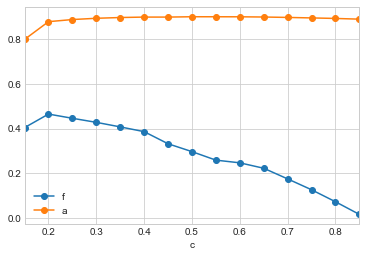

In [194]:
c = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
a = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
p = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
r = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
f = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
i = 0

for j in c:
    def flag(cols):
        x = cols[0]
        j = cols[1]
        if x > j: return 1
        else: return 0
    test_calc['j']=j
    test_calc['flag'] = test_calc[['predicted','j']].apply(flag,axis=1)
    df_table = confusion_matrix(test_calc['actual'],test_calc['flag'])
    a[i] = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
    p[i] = df_table[1,1] / (df_table[1,1] + df_table[0,1])
    r[i] = df_table[1,1] / (df_table[1,1] + df_table[1,0])
    f[i] = (2 * p[i] * r[i]) / (p[i] + r[i])
    i = i+1

df_decision = pd.concat([pd.DataFrame(c),pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(f)],axis=1)
df_decision.columns = ['c','a','p','r','f']

f_max = df_decision[df_decision['f']==df_decision['f'].max()].head(1)
max_f = float(f_max['c'])
a_max = df_decision[df_decision['a']==df_decision['a'].max()].head(1)
max_a = float(a_max['c'])

df_decision.plot(x='c',y=['f','a'],marker="o")

print ("max f: ",max_f)
print ("max a: ",max_a)

# Confusion matrix

* A confusion matrix shows the number of correct and incorrect predictions made by the classification model compared to the actual outcomes (target value) in the data. Accuracy is the proportion of the total number of predictions that were correct. Recall is the proportion of actual positive cases which are correctly identified. Precision is the proportion of positive cases that were correctly identified.
* Accuracy: 87.78%

In [195]:
x_test = sm.add_constant(x_test).copy()
y_pred = result.predict(x_test)
test_calc = pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['pred'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.2 else 0)
df_table = confusion_matrix(test_calc['actual'],test_calc['pred'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[10192   786]
 [  724   655]]
accuracy: 0.877802055515
precision: 0.454545454545
recall: 0.474981870921
f1 score:  0.464539007092


# ROC and Gini

* The ROC chart is similar to the gain or lift charts in that they provide a means of comparison between classification models. The ROC chart shows false positive rate on X-axis and true positive rate on Y-axis. Area under ROC curve is often used as a measure of quality of the classification models. A random classifier has an area under the curve of 0.5, while AUC for a perfect classifier is equal to 1. In practice, most of the classification models have an AUC between 0.5 and 1.
* Gini coefficient can be straigh away derived from the AUC ROC number. Gini is nothing but ratio between area between the ROC curve and the diagnol line & the area of the above triangle. Following is the formulae used Gini = 2*AUC – 1

ROC: 0.773
Gini: 0.547


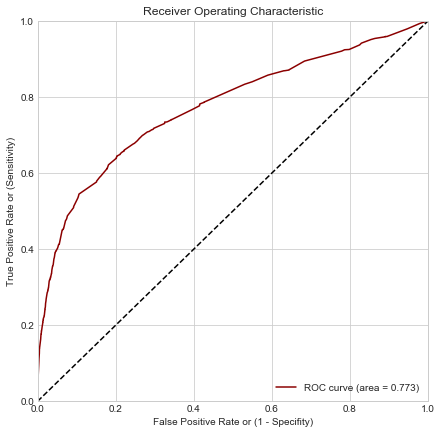

In [196]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred = model.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,7))
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc,color="darkred")
plt.plot([0, 1], [0, 1], 'k--',color="black") 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

print ('ROC:', round(roc_auc,3))
print('Gini:', round((2*roc_auc - 1),3))

# KS and Gain Chart  

* K-S or Kolmogorov-Smirnov chart measures performance of classification models. More accurately, K-S is a measure of the degree of separation between the positive and negative distributions. The K-S is 100 if the scores partition the population into two separate groups in which one group contains all the positives and the other all the negatives. On the other hand, If the model cannot differentiate between positives and negatives, then it is as if the model selects cases randomly from the population. The K-S would be 0. In most classification models the K-S will fall between 0 and 100, and that the higher the value the better the model is at separating the positive from negative cases.
* Gain or lift is a measure of the effectiveness of a classification model calculated as the ratio between the results obtained with and without the model. Gain and lift charts are visual aids for evaluating performance of classification models. However, in contrast to the confusion matrix that evaluates models on the whole population gain or lift chart evaluates model performance in a portion of the population. 

KS:  44.52 %


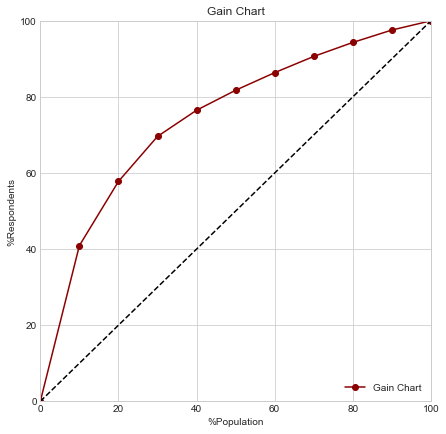

In [204]:
temp = test_calc.sort_values('predicted', ascending=False)
temp['good']=temp['predicted']
temp['bad']=1-temp['predicted']

temp.reset_index(inplace=True)
n = (temp.shape[0]+2)/10
temp['n']=temp.index + 1
temp['flag']=temp['n']/n
temp['flag']=temp['flag'].apply(lambda x: int(math.floor(x)))

y_chart = temp.groupby(['flag'], axis=0)['good','bad'].sum()
y_chart = y_chart.apply(lambda c: c / c.sum() * 100, axis=0)
y_chart = y_chart.apply(lambda c: c.cumsum(), axis=0)
y_chart['KS']=y_chart['good']-y_chart['bad']

gain1 = [0]
gain2 = np.array(y_chart['good'])
gain3 = np.concatenate((gain1,gain2), axis=0)
x10 = np.arange(0,110,10)

plt.figure(figsize=(7,7))
plt.plot(x10, gain3, label='Gain Chart',color="darkred",marker='o')
plt.plot([0, 100], [0, 100], 'k--',color="black") 
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.xlabel('%Population')
plt.ylabel('%Respondents')
plt.title('Gain Chart')
plt.legend(loc="lower right")

ks = max(y_chart['KS'])
print('KS: ',round(ks,2),'%')